# Analysis of age

In [1]:
%run setup.py

In [2]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

df_Invited.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity
0,Glovanni De WIichcli,2003,ASPDAC,Glovanni,De,WIichcli,M,0,0,0,0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.000000
1,Tadahiro Ohm,2003,ASPDAC,Tadahiro,NaN,Ohm,M,27,92,1993,10,Asia and South Pacific Design Automation Confe...,Computer Architecture,2.700000
2,Ycrvant Zorian,2003,ASPDAC,Ycrvant,NaN,Zorian,M,0,0,0,0,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.000000
3,Gary L. Baldwi,2004,ASPDAC,Gary,L.,Baldwi,M,4,4,1962,42,Asia and South Pacific Design Automation Confe...,Computer Architecture,0.095238
4,Rudy Lauwereins,2004,ASPDAC,Rudy,NaN,Lauwereins,M,112,196,1987,17,Asia and South Pacific Design Automation Confe...,Computer Architecture,6.588235


### Define function

In [3]:
def plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Academic age at the time of the conference')
    ax1.set_ylabel('Density')
    ax1.set_title('Historgram of age')
    ax1.legend(loc='upper right')
    
    # Prepare data for log-log histogram
    bins = np.logspace(np.log10(min(list1)), np.log10(max(list1)), 20)
    hist,edges = np.histogram(list1, bins=bins, density=True)
    x = (edges[1:]+edges[:-1])/2.

    bins1 = np.logspace(np.log10(min(list2)), np.log10(max(list2)), 20)
    hist1,edges1 = np.histogram(list2, bins=bins1, density=True)
    x1 = (edges1[1:]+edges1[:-1])/2.
    
    xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
    xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])

    ax2.plot(xx, yy, label=list1_label,marker='.')
    ax2.plot(xx1, yy1, label=list2_label,marker='.')
    ax2.set_xlabel('Academic age at the time of the conference')
    ax2.set_ylabel('Probability Density')
    ax2.set_title('log-log Age')
    ax2.legend(loc='upper right')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    
    fig.suptitle(fig_title, fontsize=14)
    
    plt.show()

In [4]:
def single_plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins):
    fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Academic age at the time of the conference')
    ax1.set_ylabel('Density')
    ax1.set_title('Historgram of Seniority')
    ax1.legend(loc='upper right')
    
    plt.show()

## Histogram between invited/proceedings

In [5]:
# Create lists
age_pro = df_Proceedings['Age'].values
age_inv = df_Invited['Age'].values

# drop all the rows with 0 paper count
age_inv = age_inv[age_inv != 0]
age_pro = age_pro[age_pro != 0]

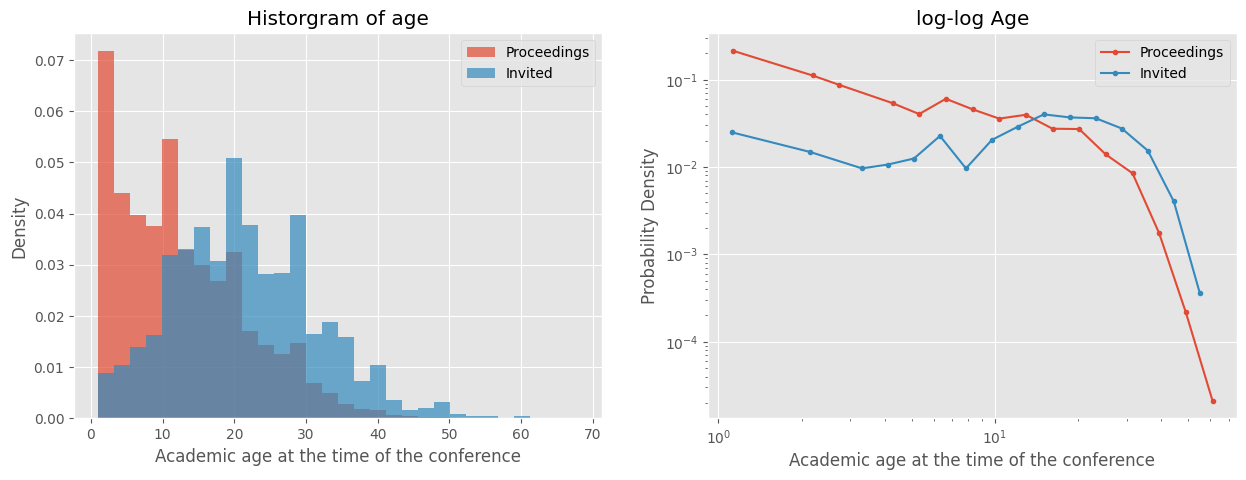

In [6]:
plot_hist(age_pro,'Proceedings',age_inv,'Invited','',30)

The line for invited speakers seems also most normal distributed, where the proceedings are more exponentially distributed. It seems that very young academic does not start right away with becoming an invted speakers. But it does not take long to attend a conference as a particitant (proceedings)

## Histogram between females and males

In [7]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
age_male = list(df_Proceedings[df_Proceedings['gender'] == 'M']['Age'].values) + list(df_Invited[df_Invited['gender'] == 'M']['Age'].values)
age_female = list(df_Proceedings[df_Proceedings['gender'] == 'F']['Age'].values) + list(df_Invited[df_Invited['gender'] == 'F']['Age'].values)

# drop all the rows with 0 paper count
age_male = [x for x in age_male if x != 0]
age_female = [x for x in age_female if x != 0]

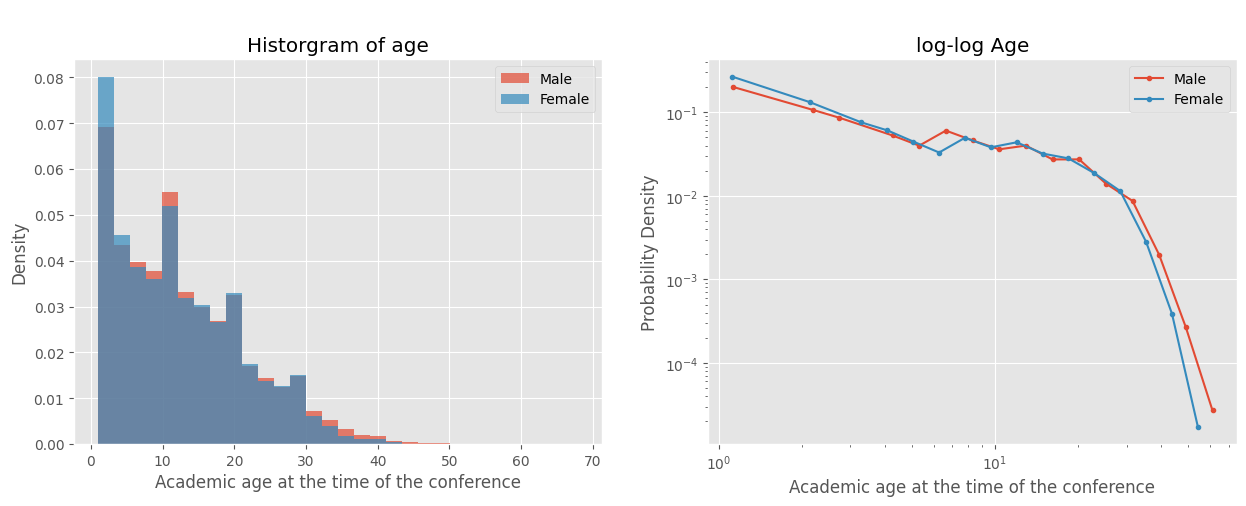

In [8]:
plot_hist(age_male,'Male',age_female,'Female',' ',30)

There is hardly any difference, although male continues for a longer period than females. The plot is heavely dominated by the proceedings. 

## Histogram between females and males for invited

In [9]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
age_male_inv = df_Invited[df_Invited['gender'] == 'M']['Age'].values
age_female_inv = df_Invited[df_Invited['gender'] == 'F']['Age'].values

# drop all the rows with 0 paper count
age_male_inv = age_male_inv[age_male_inv != 0]
age_female_inv = age_female_inv[age_female_inv != 0]

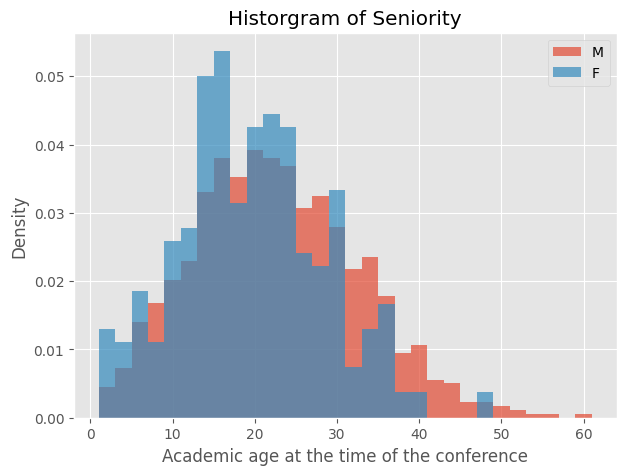

In [10]:
single_plot_hist(age_male_inv,'M',age_female_inv,'F','Invited',30)

## Histogram between females and males for proceedings

In [11]:
age_male_pro = df_Proceedings[df_Proceedings['gender'] == 'M']['Age'].values
age_female_pro = df_Proceedings[df_Proceedings['gender'] == 'F']['Age'].values

# drop all the rows with 0 paper count
age_male_pro = age_male_pro[age_male_pro != 0]
age_female_pro = age_female_pro[age_female_pro != 0]

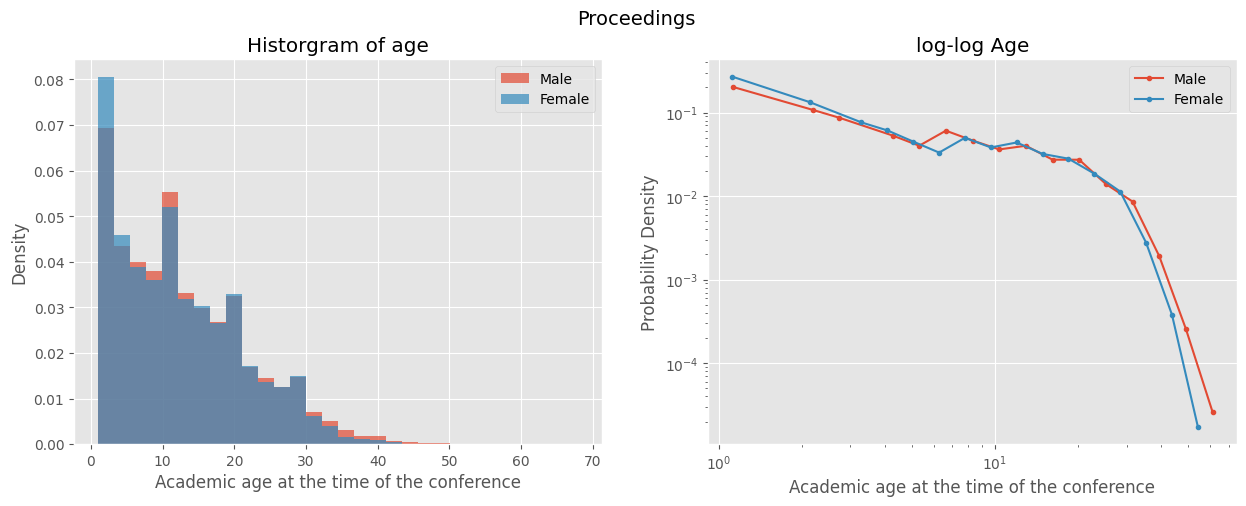

In [12]:
plot_hist(age_male_pro,'Male',age_female_pro,'Female','Proceedings',30)

## Histogram per field

### Define function

In [13]:
def get_field_lists(df,field):
    df = df[df['Main Topic'] == field]
    list_M = df[df['gender'] == "M"]['Age'].values
    list_F = df[df['gender'] == "F"]['Age'].values
    
    list_M = list_M[list_M != 0]
    list_F = list_F[list_F != 0]
    return list_M,list_F

conference_list = list(df_Invited['Main Topic'].unique())

In [14]:
conference_list

['Computer Architecture',
 'Human-Computer Interaction',
 'Concurrent, distributed and parallel computing',
 'Computational Social Science',
 'Artificial Intelligence',
 'Data Management',
 'Algorithm and Theory']

3.72 % of the data set is in this field: Computational Social Science


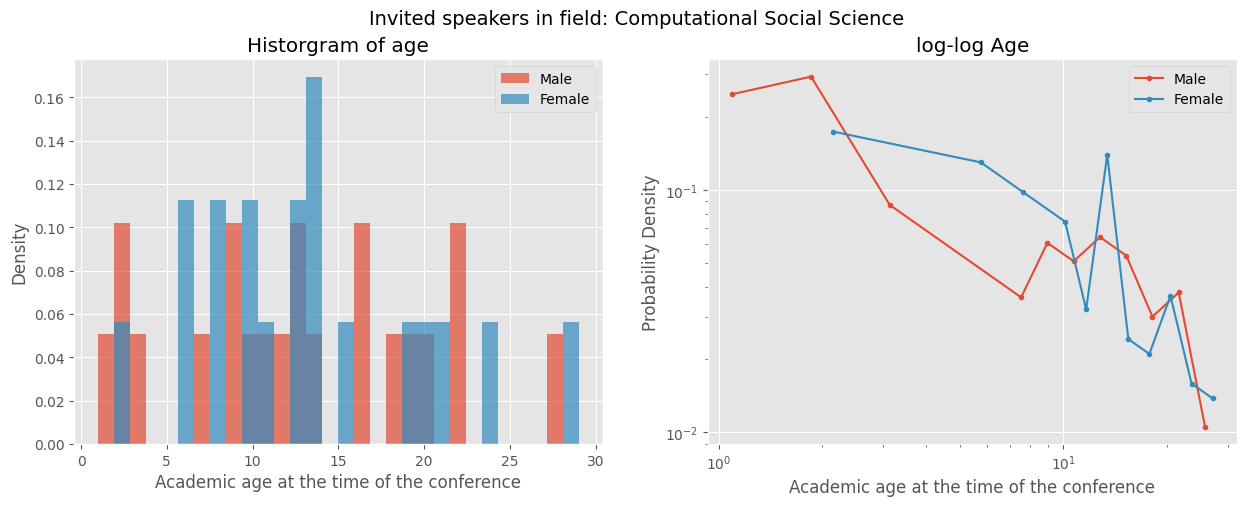

In [15]:
id = 3
print(round(df_Invited[df_Invited['Main Topic'] == conference_list[id]].shape[0]/df_Invited.shape[0]*100,2),'% of the data set is in this field:',conference_list[id])
age_male_inv_field, age_female_inv_field = get_field_lists(df_Invited, conference_list[id])
plot_hist(age_male_inv_field,'Male',age_female_inv_field,'Female','Invited speakers in field: ' + conference_list[id],30)

id = 0, no data <br>
id = 1, here I see a age gap <br>
id = 2, they are quiet equal, but men are a bit older <br>
id = 3, here I see a age gap <br>
id = 4, there are many gaps <br>
id = 5, nothing interesting <br>
id = 6, nothing interesting <br>
id = 7, gap <br>